In [ ]:
"""
Created: 6/7

Purpose: To incorporate the synapses
into the neuron object

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

In [3]:
# #configuring will include the adapters
# minnie,schema = du.configure_minnie_vm()

In [4]:
import neuron_utils as nru
import neuron_visualizations as nviz

# Downloading a Neuron to Play with

In [5]:
segment_id = 864691136194042326

In [6]:
# original_mesh = du.fetch_segment_id_mesh(segment_id)

In [7]:
# neuron_obj  = du.decomposition_with_spine_recalculation(segment_id,split_index = 0)

In [8]:
# import synapse_utils as syu
# neuron_obj_syn = syu.add_synapses_to_neuron_obj(neuron_obj,
#                                                 segment_id = segment_id,
#                             validation = True,
#                             verbose  = True,
#                             #original_mesh = original_mesh,
#                             plot_valid_error_synapses = False,
#                             calculate_synapse_soma_distance = False,
#                             add_valid_synapses = True,
#                               add_error_synapses=False)

# Decompressing the Neuron to place with

In [9]:
import system_utils as su
original_mesh = su.decompress_pickle("original_mesh.pbz2")

In [10]:
neuron_obj = nru.decompress_neuron("./864691136194042326_0_25_axon_v5.pbz2",
                                  original_mesh=original_mesh)

Decompressing Neuron in minimal output mode...please wait


In [11]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")

Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


# Function that will run the high degree branching

In [14]:
limb_obj = neuron_obj[0]
short_thick_endnodes_to_remove = au.short_thick_branches_from_limb(limb_obj,
                                 verbose = False)

In [166]:
ed.high_degree_upstream_match?

downstream_branches = [160 185 184]
skipped_nodes = []
Total number of short_thick_endnodes_to_remove = 28
downstream_branches after remove_short_thick_endnodes = [160 184 185]
widths_in_branches = [49.30088943 73.90939066 60.69847888 63.2828792 ]
Last group is skipped
Group blue: [160]
Group green: [184]
Group red: [185]
Group cyan: [179]
Group magenta: []


branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))
Performing Edge Query
After edge filter, # of rows = 3

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  184     29.67   24.608501               0.332955   
1  160  185     32.65   11.397589               0.187774   
2  160  179    121.04   13.981990               0.220944   
3  184  185    127.51   13.210912               0.178745   
4  184  179     30.98   10.626511               0.143778   
5  185  179     83.01    2.584400               0.040839   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  
0              0.000033                0                  False  
1              0.000090                1                   True  
2              0.000013                0                  False  
3              0.000057                1                   True  
4              0.000020                0                  False  
5 

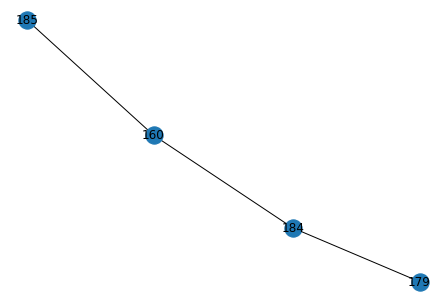

Performing global features query
Performing Edge Query
After edge filter, # of rows = 3

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  184     29.67   24.608501               0.332955   
1  160  185     32.65   11.397589               0.187774   
2  184  179     30.98   10.626511               0.143778   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000033                0                  False   
1              0.000090                1                   True   
2              0.000020                0                  False   

  definite_partner_sk_delete definite_partner_width_delete  
0                       None                          None  
1                       None                          None  
2                       None                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  184     29.67   24.608501               0

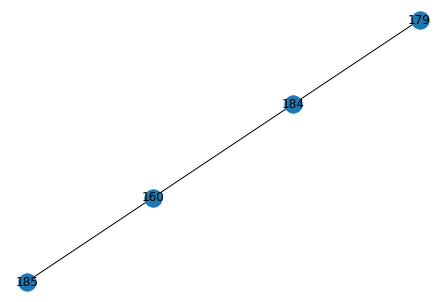

Performing node features query
Performing Edge Query
After edge filter, # of rows = 3

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  184     29.67   24.608501               0.332955   
1  160  185     32.65   11.397589               0.187774   
2  184  179     30.98   10.626511               0.143778   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000033                0                  False   
1              0.000090                1                   True   
2              0.000020                0                  False   

  definite_partner_sk_delete definite_partner_width_delete  \
0                       None                          None   
1                       None                          None   
2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
  

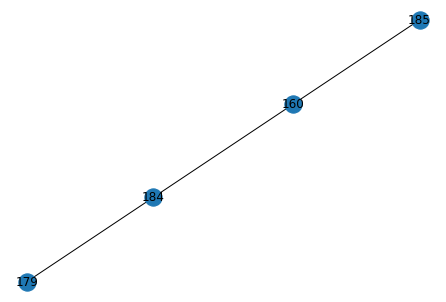

Last group is skipped
Group blue: [160, 185, 179, 184]
Group green: []


for upstream node 179, winning_node = 184, error_branches = [160 185]


In [163]:
return_value = ed.high_degree_upstream_match(neuron_obj[0],
                          #branch_idx=108,
                                          branch_idx = 179,
                                             skip_distance = 1500,
                        short_thick_endnodes_to_remove = short_thick_endnodes_to_remove,
                               plot_starting_branches = True,
                           plot_extracted_skeletons = False,
                           perform_synapse_filter = False,
                           plot_G_local_edge = True,
                           plot_G_global_edge=True,
                                             #sk_angle_buffer=25,
                                             #width_diff_perc_threshold = 0.15,
                                             #width_diff_perc_buffer = 0.03,
                           plot_G_node_edge = True,
                                    kiss_check=False,
                               plot_final_branch_matches = True,
                                    verbose = True,)


[184]

# Determine what to make the skip distance (based on the width of the upstream?)

In [107]:
upstreams_with_skips = []
upstreams_with_skips_skip_nodes = []
for b_idx in neuron_obj.axon_limb_branch_dict["L0"]:
    endnodes, skipped = cnu.endnode_branches_of_branches_within_distance_downtream(neuron_obj[0],
                                                                                          b_idx,
                                                                                           skip_distance=2000,
                                                                                          return_skipped_branches=True)
    n_endnodes = len(endnodes)
    n_skipped = len(skipped)
    #print(f"Branch {b_idx}: # of endnodes = {n_endnodes}, # skipped branches = {n_skipped}")
    
    if n_skipped > 0:
        upstreams_with_skips.append(b_idx)
        upstreams_with_skips_skip_nodes.append([neuron_obj[0][k].skeletal_length for k in skipped])

In [108]:
upstreams_with_skips

[19, 58, 87, 91, 108, 147]

In [109]:
upstreams_with_skips_skip_nodes

[[1371.059139517871],
 [1820.2427105069546],
 [1857.4998682427333],
 [1723.1227278966253],
 [1608.5535609834371],
 [1989.2129258246928]]

In [122]:
import axon_utils as au

curr_idx = 5

branch_idx = upstreams_with_skips[curr_idx]

print(f"Branch idx = {branch_idx}, Width = {au.axon_width(limb_obj[branch_idx])}")
print(f"skip distances = {upstreams_with_skips_skip_nodes[curr_idx]}")
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                         "L0",branch_idx,
                                         print_axon_border_info = False)

Branch idx = 147, Width = 96.32212019273626
skip distances = [1989.2129258246928]
# of downstream targets = 2
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


In [165]:
import error_detection as ed
ed.high_degree_branch_errors_limb_branch_dict(
    neuron_obj,
    plot_limb_branch_post_filter=True,
    verbose = True,
    high_degree_order_verbose=False,
    plot_limb_branch_errors = True,
plot_final_branch_matches = False)

The initial limb branch dict after min_skeletal_distance = 500 
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot




 ----- Working on limb L0-------


 ----- Working on branch 0/222: 0--------
For 0 the skip distance was 830.7380977153268 (for width 87.46496658800797)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/222: 1--------
For 1 the skip distance was 809.5467924346847 (for width 82.31850673413773)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/222: 2--------
For 2 the skip distance was 792.6827973827676 (for width 78.22296507867216)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/222: 3--------
For 3 the skip distance was 910.8224326853513 (for width 106.91401936644247)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 4/222: 4--------
For 4 the skip distance was 787.7761764367415 (for width 77.03135713463723)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 5/222: 5--------
For 5 the skip distance was 766.0547142855313 (for width 71.75614489791475)

winning_downstream = 48,error_downstream = [44 46] 


 ----- Working on branch 48/222: 48--------
For 48 the skip distance was 890.8828597738224 (for width 102.07155165935687)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 49/222: 49--------
For 49 the skip distance was 881.6106254639633 (for width 99.81972332696253)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 50/222: 50--------
For 50 the skip distance was 838.7760930721049 (for width 89.41705117465408)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 51/222: 51--------
For 51 the skip distance was 972.1606186341826 (for width 121.81043595401579)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 52/222: 52--------
For 52 the skip distance was 861.1076235989219 (for width 94.84042287402391)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 53/222: 53--------
For 53 the skip distance was 782.6277427

winning_downstream = None,error_downstream = [] 


 ----- Working on branch 98/222: 98--------
For 98 the skip distance was 721.3552555634449 (for width 60.90056206540804)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 99/222: 99--------
For 99 the skip distance was 814.2526139772243 (for width 83.46134910875449)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 100/222: 100--------
For 100 the skip distance was 663.4245632206967 (for width 46.83167963931207)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 101/222: 101--------
For 101 the skip distance was 981.5568748826918 (for width 124.09238390008232)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 102/222: 102--------
For 102 the skip distance was 664.9212631712107 (for width 47.19516391300833)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 103/222: 103--------
For 103 the skip distance was 742

winning_downstream = None,error_downstream = [] 


 ----- Working on branch 154/222: 154--------
For 154 the skip distance was 784.5056794773923 (for width 76.23709358736673)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 155/222: 155--------
For 155 the skip distance was 724.190200107306 (for width 61.589048597488635)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 156/222: 156--------
For 156 the skip distance was 774.5841470982243 (for width 73.82757858099735)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 157/222: 157--------
For 157 the skip distance was 612.6739010551368 (for width 34.506518827676075)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 158/222: 158--------
For 158 the skip distance was 652.7900355933277 (for width 44.24900864409388)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 159/222: 159--------
For 159 the skip distance w

winning_downstream = None,error_downstream = [] 


 ----- Working on branch 210/222: 210--------
For 210 the skip distance was 1383.8470247942137 (for width 221.79142030716622)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 211/222: 211--------
For 211 the skip distance was 770.5381162356867 (for width 72.84497108580965)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 212/222: 212--------
For 212 the skip distance was 1136.189636039313 (for width 161.64605446669032)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 213/222: 213--------
For 213 the skip distance was 723.6911807168354 (for width 61.467858174088626)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 214/222: 214--------
For 214 the skip distance was 1293.6151797842745 (for width 199.87797223332385)
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 215/222: 215--------
For 215 the skip dista

{'L0': array([ 10,  18,  44,  46,  58,  66,  72,  79,  89, 121, 131,  83,  93,
        103, 116, 143, 165, 171, 160, 185,  39, 183, 194, 196])}

# Try proofreading the neuron using only high degree filter

In [170]:
import proofreading_utils as pru
output = pru.apply_proofreading_filters_to_neuron(neuron_obj,
                                                 filter_list = [pru.exc_axon_on_dendrite_merges_filter,
                                                         pru.exc_high_degree_branching_filter_v6],
                                                 plot_limb_branch_filter_with_disconnect_effect = True)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}


Recieved another instance of Neuron class in init -- so just copying data


Branches Requested to Remove (WITH disconnect effect)
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


Recieved another instance of Neuron class in init -- so just copying data
Recieved another instance of Neuron class in init -- so just copying data

--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L0': array([ 10,  18,  44,  46,  58,  66,  72,  79,  89, 121, 131,  83,  93,
       103, 116, 143, 165, 171, 160, 185,  39, 183, 194, 196])}


Branches Requested to Remove (WITH disconnect effect)
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 146.5985279083252 -----


In [28]:
upstream_branch = 108
upstream_subgraph = np.array([list(k) for k in nx.connected_components(ret_df) 
                                  if upstream_branch in k][0])
upstream_subgraph

array([120, 108])

In [ ]:
nviz.plot_intermediates(limb_obj,
                  [19, 115, 120, 108])

In [ ]:
all_branch_idx = [19, 115 ,120, 108]
G = xu.complete_graph_from_node_ids(all_branch_idx)
G.edges()